## Sentiment Analysis on US Airline Reviews

In [57]:
#%pip install tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding



In [45]:
amazondata = []
with open("./amazonreviewssmall.txt") as f: 
    for line in f: 
        line = line.replace("__label__2 ", "positive\t")
        line = line.replace("__label__1 ", "negative\t")
        amazondata.append(line.split("\t"))
        # re.sub(r"__label_2 ", "positive\t", line)
        # re.sub(r"__label__1", "negative\t", line)
        #break
        
#print(amazondata)
review_df = pd.DataFrame(amazondata)
review_df.columns = ["sentiment", 'text']
#df.head
review_df = review_df.sample(14873, random_state=1)

In [58]:
review_df.head()
review_df['sentiment'].value_counts()
sentiment_label = review_df.sentiment.factorize()
sentiment_label
review = review_df.text.values
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [59]:
#process twitter data
df = pd.read_csv("./Tweets.csv")
df.head()
df.columns
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)
tweet_df["airline_sentiment"].value_counts()
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

(14640, 2)
(11541, 2)


In [1]:
print(tokenizer.word_index)

NameError: name 'tokenizer' is not defined

In [ ]:
print(tweet[0])
print(encoded_docs[0])

In [47]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   87   60  138  273   10  132  862    6   13  618    5  126
 6833    7    1 6834  283  203   17    6   13  164    6   14   80 1298
   28   15   21  104  503    5  120    7   17 3546   11   75    1  115
 1502    7 3937 1150   41   50  559   84  128   37  456   15   23   15
   47 

In [61]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
________________________________________________

In [62]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 34s 108ms/step - loss: 0.3955 - accuracy: 0.8371 - val_loss: 0.2145 - val_accuracy: 0.9212
Epoch 2/5
289/289 [==============================] - 31s 108ms/step - loss: 0.2196 - accuracy: 0.9143 - val_loss: 0.1675 - val_accuracy: 0.9342
Epoch 3/5
289/289 [==============================] - 31s 108ms/step - loss: 0.1626 - accuracy: 0.9372 - val_loss: 0.1618 - val_accuracy: 0.9407
Epoch 4/5
289/289 [==============================] - 31s 108ms/step - loss: 0.1337 - accuracy: 0.9500 - val_loss: 0.1838 - val_accuracy: 0.9433
Epoch 5/5
289/289 [==============================] - 31s 108ms/step - loss: 0.1138 - accuracy: 0.9580 - val_loss: 0.1711 - val_accuracy: 0.9441


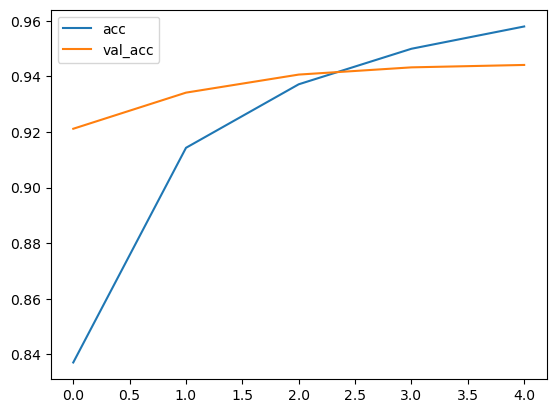

<Figure size 640x480 with 0 Axes>

In [64]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Amazon Review Accuracy plot.jpg")

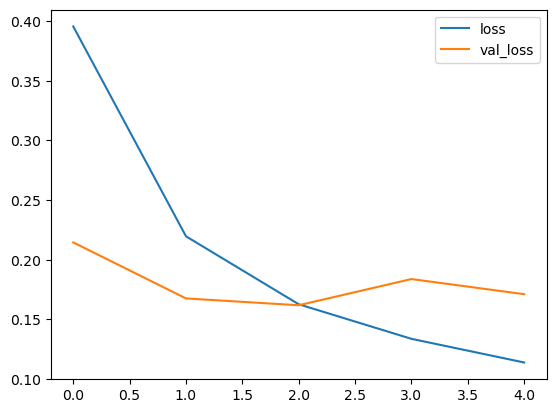

<Figure size 640x480 with 0 Axes>

In [65]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Amazon Review Loss plot.jpg")

In [52]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [67]:
test_sentence1 = "Still waiting on bags from flight 1613/2440 yesterday  First Class passenger not happy with your service."
predict_sentiment(test_sentence1)

test_sentence2 = "So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America."
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 20ms/step
Predicted label:  negative
1/1 [==============================] - 0s 20ms/step
Predicted label:  positive
